# Written by jonathan kjellen 

In [ ]:
# To run this notebook the package sentence_transformer is needed and can be install by 
# !pip install sentence_transformers

In [ ]:
#It is also necessary to have the following 3 files in the correct path or change the path variable to where the data is located:

file_path_opinion_survey = "../data/data_all/people_opinion_topics.xlsx"
file_path_debate_sentiment = "../data/data_2018-09-09_to_2022-09-11/Debates_sentiments.csv"
file_path_debate_topics = '../data/data_2018-09-09_to_2022-09-11/data_debates_topics.txt'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import ast
import json
import requests
import re
from sentence_transformers import SentenceTransformer, util

In [2]:


df = pd.read_csv(file_path_debate_sentiment)

for i in range(len(df)):
    df.at[i,"answer"] = ast.literal_eval(df.iloc[i]["answer"])


with open(file_path_debate_topics, 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)
df2 = pd.DataFrame(json_object)

df["name_topic_question"] = df2["name_topic_question"]
df["top_n_words_question"] = df2["top_n_words_question"]
for i in range(len(df)):
    answer = df.iloc[i]["answer"]
    for j in range(len(answer)):
        answer[j]["name_topic_answer"] = df2.iloc[i]["answer"][j]["name_topic_answer"]
        answer[j]["Top_n_words"] = df2.iloc[i]["answer"][j]["Top_n_words"]
df = df.drop_duplicates(subset='id_')
df = df.dropna()
df = df.reset_index(drop=True)


In [3]:
count=0
df["mean_diff"] = None
df["party_sentiment"] = None
df["num_appearance"] = None
for i in range(len(df)):
    #print(df.iloc[i])
    #print(df.iloc[i]["top_n_words_question"][:5])
    answer = df.iloc[i]["answer"]
    total_diff = 0
    total_len = 0
    party_sentiment = {}
    num_appearance = {}
    party_question = df.iloc[i]["undertecknare_partibet"]
    probs_question = ast.literal_eval(df.iloc[i]["question_BERT_probs"])
    #print(type(probs_question))
    probs_question = [float(x) for x in probs_question]
    if party_question in party_sentiment:
        differences = [abs(party_question[party_question][l] + probs_question[l]) for l in [0,1,2]]
        party_sentiment[party_question] = differences
        num_appearance[party_question] +=1
    else:
        party_sentiment[party_question] = probs_question
        num_appearance[party_question] = 1
        
    for j in range(len(answer)):
        party = answer[j]["besvaradav_partibet"]
        probs = answer[j]["answer_BERT_probs"]
        #print(type(probs))
        probs = [float(x) for x in probs]
        
        if party in party_sentiment:
            differences = [abs(party_sentiment[party][l] + probs[l]) for l in [0,1,2]]
            party_sentiment[party] = differences
            num_appearance[party] +=1
        else:
            party_sentiment[party] = probs
            num_appearance[party] = 1
        for k in range(j+1,len(answer)):
            #differences
            differences = [abs(answer[j]["answer_BERT_probs"][l] - answer[k]["answer_BERT_probs"][l]) for l in [0,2]]
            total_diff += sum(differences)
            total_len += 1
    print(party_sentiment)
    for key in party_sentiment:
        differences = [abs(party_sentiment[key][l]/num_appearance[key]) for l in [0,2]]
        party_sentiment[key] = differences
    df.at[i,"party_sentiment"] = party_sentiment
    df.at[i,"num_appearance"] = num_appearance
    mean_diff = 0
    if total_len != 0:
        mean_diff = total_diff/total_len
    count+=1
    df.at[i,"mean_diff"] = mean_diff
    #df.iloc[i]["mean_diff"] = mean_diff
    #print(df.iloc[i]["mean_diff"])
    
    print(count)

{'V': [0.25007992424070835, 2.8712876439094543, 0.8786324560642242], 'S': [0.032622828148305416, 2.3543395698070526, 1.6130377054214478]}
1
{'SD': [1.0118308290839195, 2.2457847893238068, 0.7423844933509827], 'S': [0.0757671445608139, 2.526744246482849, 1.3974885866045952]}
2
{'C': [0.5185890146531165, 3.9180118441581726, 1.5633989498019218], 'S': [0.03852237714454532, 2.500588446855545, 1.4608891978859901]}
3
{'KD': [0.3124462841078639, 4.769379258155823, 0.9181744530797005], 'S': [0.033343099523335695, 3.077317714691162, 0.8893391191959381]}
4
{'KD': [0.3376896269619465, 2.6723133325576782, 0.989997036755085], 'S': [0.04476476553827524, 3.473066568374634, 0.4821684956550598]}
5
{'KD': [0.12965810671448708, 3.2299808859825134, 0.6403609961271286], 'S': [0.059374633245170116, 3.0066763758659363, 0.9339490234851837]}
6
{'M': [1.283768706023693, 2.434948682785034, 0.2812826484441757], 'S': [0.1264769472181797, 3.3158633708953857, 0.5576598346233368]}
7
{'SD': [0.40706583485007286, 3.1647

{'M': [1.0895844548940659, 4.510065972805023, 1.4003496021032333], 'S': [0.09563306532800198, 2.6816638112068176, 1.2227030023932457]}
672
{'M': [1.4486390352249146, 4.213858932256699, 1.3375020176172256], 'S': [0.09563306532800198, 2.6816638112068176, 1.2227030023932457]}
673
{'M': [0.18890513107180595, 3.375870406627655, 0.43522458523511887], 'S': [0.06912050675600767, 2.32568296790123, 1.60519640147686]}
674
{'M': [0.09988019522279501, 2.083020716905594, 1.8170989900827408], 'S': [0.05534299649298191, 2.0734570026397705, 1.871200144290924]}
675
{'SD': [0.31255362555384636, 1.8511294722557068, 1.8363169431686401], 'S': [0.21183139830827713, 2.646113932132721, 1.1420546621084213]}
676
{'M': [0.10266869515180588, 3.3092247247695923, 0.5881064794957638], 'MP': [0.1706167608499527, 3.217092514038086, 0.612290769815445]}
677
{'L': [0.27982456237077713, 2.726342499256134, 0.9938330352306366], 'MP': [0.21196455229073763, 2.085281118750572, 1.7027543783187866], 'M': [0.5833206474781036, 1.67

{'M': [1.3931594043970108, 6.879127621650696, 1.7277131229639053], 'S': [0.2981976717710495, 3.094478487968445, 0.6073238104581833]}
1334
{'M': [1.4774499610066414, 6.83131331205368, 1.6912367939949036], 'S': [0.2981976717710495, 3.094478487968445, 0.6073238104581833]}
1335
{'V': [0.07294601481407881, 1.215891107916832, 2.7111629247665405], 'S': [0.025948198977857828, 1.7698356211185455, 2.2042160630226135], 'KD': [0.07097669411450624, 1.2730827331542969, 0.655940592288971]}
1336
{'M': [0.6558106169104576, 3.997780919075012, 1.3464084342122078], 'S': [0.24529191851615906, 3.0156955122947693, 0.7390125878155231]}
1337
{'M': [0.4458771161735058, 4.9491376876831055, 0.6049850843846798], 'S': [0.05010752845555544, 2.728013277053833, 1.2218791469931602]}
1338
{'KD': [0.22635575756430626, 3.3530202507972717, 0.4206239990890026], 'S': [0.07460490800440311, 3.330433964729309, 0.59496109187603]}
1339
{'V': [1.1641031205654144, 4.957677900791168, 1.8782190680503845], 'S': [0.08273081481456757, 3

In [6]:
df["mean_diff_total"] = None
for i in range(len(df)):
    #print(df.iloc[i]["party_sentiment"])
    sent = df.iloc[i]["party_sentiment"]
    if sent != {}:
        list_Sent = list(sent)
        #print(list_Sent)
        tot_diff = []
        for j in range(len(list_Sent) -1):
            #print(sent)
            diff_1 = abs(sent[list_Sent[j]][0] - sent[list_Sent[j+1]][1])
            diff_2 = abs(sent[list_Sent[j+1]][0] - sent[list_Sent[j]][1])
            diff = diff_1 - diff_2
            tot_diff.append(diff)
            #differences = [abs(sent[list_Sent[i]][l] + sent[list_Sent[i+1]][l]) for l in [0,1,2]]
            #print(diff)
            #print((differences[0] + differences[2]) - differences[1])
        if len(list_Sent) > 1:
            df.at[i,"mean_diff_total"] = max(tot_diff)
#df.head(50)["party_sentiment"]

{'V': [0.06251998106017709, 0.21965811401605606], 'S': [0.008155707037076354, 0.40325942635536194]}
{'SD': [0.2529577072709799, 0.18559612333774567], 'S': [0.018941786140203476, 0.3493721466511488]}
{'C': [0.08643150244218607, 0.26056649163365364], 'S': [0.00963059428613633, 0.36522229947149754]}
{'KD': [0.052074380684643984, 0.1530290755132834], 'S': [0.008335774880833924, 0.22233477979898453]}
{'KD': [0.08442240674048662, 0.24749925918877125], 'S': [0.01119119138456881, 0.12054212391376495]}
{'KD': [0.03241452667862177, 0.16009024903178215], 'S': [0.014843658311292529, 0.23348725587129593]}
{'M': [0.32094217650592327, 0.07032066211104393], 'S': [0.031619236804544926, 0.1394149586558342]}
{'SD': [0.10176645871251822, 0.10704318434000015], 'S': [0.049533392768353224, 0.27361905947327614], 'M': [0.14636688232421874, 0.18324580192565917]}
{'SD': [0.10176645871251822, 0.10704318434000015], 'S': [0.049533392768353224, 0.27361905947327614], 'M': [0.14636688232421874, 0.18324580192565917]}
{

In [ ]:
large_diff = df.loc[df["mean_diff"] > 0.4]
controversial_topics = []
for row in large_diff.iterrows():
    print(row[1]["name_topic_question"])
    controversial_topics.append(row[1]["name_topic_question"])
    print(row[1]["party_sentiment"])
#     for answer in row[1]["answer"]:
#         print(answer["besvaradav_partibet"])
    #print(row)

In [4]:
topic_sentiment = {}
num_appearance = {}
num_appearance_large_diff = {}
for i in range(len(df)):
    topic = df.iloc[i]["name_topic_question"]
    diff = df.iloc[i]["mean_diff"]
    if topic in topic_sentiment:
        #differences = [abs(topic_sentiment[topic][l] + diff[l]) for l in [0,1,2]]
        topic_sentiment[topic] += diff
        num_appearance[topic] += 1
        if diff > 0.5:
            num_appearance_large_diff[topic] += 1
    else:
        topic_sentiment[topic] = diff
        num_appearance[topic] = 1
        if diff > 0.5:
            num_appearance_large_diff[topic] = 1
        else:
            num_appearance_large_diff[topic] = 0
for key in topic_sentiment:
    differences = abs(topic_sentiment[key]/num_appearance[key])
    topic_sentiment[key] = differences

In [5]:
topic_sentiment = {}
num_appearance = {}
num_appearance_large_diff = {}
for i in range(len(df)):
    topic = df.iloc[i]["name_topic_question"]
    diff = df.iloc[i]["mean_diff"]
    if topic in num_appearance:
        #differences = [abs(topic_sentiment[topic][l] + diff[l]) for l in [0,1,2]]
        num_appearance[topic] += 1
        if diff > 0.3:
            num_appearance_large_diff[topic] += 1
    else:
        num_appearance[topic] = 1
        if diff > 0.3:
            num_appearance_large_diff[topic] = 1
        else:
            num_appearance_large_diff[topic] = 0
for key in num_appearance:
    differences = abs(num_appearance_large_diff[key]/num_appearance[key])
    topic_sentiment[key] = differences

In [6]:
topic_sentiment

{'8_utsläpp_eu_sverige_miljö': 0.12962962962962962,
 '0_trafikverket_tomas_eneroth_infrastrukturminister': 0.26811594202898553,
 '26_utsläpp_fordon_transportsektorn_svenska': 0.14285714285714285,
 '4_bo_bostäder_unga_villa': 0.023255813953488372,
 '21_kvinnor_äktenskap_könsstympning_flickor': 0.08,
 '12_barn_sexualbrott_brott_sexuella': 0.03333333333333333,
 '50_polisen_morgan_johansson_tullverket': 0.1,
 '44_veteranfordon_fordon_rullande_kulturarvet': 0.2727272727272727,
 '1_turkiet_is_iran_utrikesminister': 0.1076923076923077,
 '20_poliser_fler_polis_polismyndigheten': 0.1935483870967742,
 '23_kvinnor_kvinnors_våld_fn': 0.08695652173913043,
 '7_el_elproduktion_södra_ringhals': 0.06666666666666667,
 '31_samhall_arbetsmiljön_eva_nordmark': 0.23076923076923078,
 '43_livsmiljö_vindkraftverk_buller_ragunda': 0.0,
 '10_arbetsförmedlingen_eva_nordmark_arbetsmarknadsminister': 0.09803921568627451,
 '24_fisket_östersjön_fisk_fiskestoppet': 0.09090909090909091,
 '15_malus_bonus_fordon_bilen': 

In [7]:
#file_path_opinion_survey = "../data/data_all/people_opinion_topics.xlsx"

df_opinion = pd.read_excel(file_path_opinion_survey,header=1)
df_opinion.rename(columns={'Unnamed: 0': 'Topic'}, inplace=True)
columns_to_change = df_opinion.columns.tolist()[1:32]
for column in columns_to_change:
    df_opinion[column] = df_opinion[column].str.rstrip('%').astype('float') / 100.0

In [8]:
model = SentenceTransformer('KBLab/sentence-bert-swedish-cased')
def find_most_correlated(query):
    corpus = df_opinion["Topic"].tolist()
    
    embeddings = model.encode(corpus,convert_to_tensor=True)
    query_embedding = model.encode(query, convert_to_tensor=True)
    #Compute cosine-similarities for each sentence with each other sentence
    cosine_scores = util.cos_sim(embeddings, query_embedding)
    #top_results = torch.topk(cos_scores, k=top_k)

    hits = util.semantic_search(query_embedding, embeddings, score_function=util.dot_score)
    hits = hits[0]      #Get the hits for the first query

    print(corpus[hits[0]["corpus_id"]])
    return corpus[hits[0]["corpus_id"]]

In [9]:
def combining_data_from_opinion(date_start,date_end, topic):
    column_index_start = df_opinion.columns.get_loc(date_start)
    column_index_end = df_opinion.columns.get_loc(date_end) + 1

    amount_of_cols = column_index_end - column_index_start

    avg_value = df_opinion[df_opinion["Topic"] == topic].iloc[:, column_index_start:column_index_end].sum().sum()/amount_of_cols
    #print(avg_value) 
    return avg_value

In [10]:
topic_sentiment_values = []
topics_diff = {}
topics_appearance = {}
topics_opinion_val = {}
for topic in topic_sentiment:
    most_correlated_topic = find_most_correlated(topic)
    value = combining_data_from_opinion("18-jun","22-jan",most_correlated_topic)
    #value = df_opinion[df_opinion["Topic"] == most_correlated_topic]["22-jan"].values[0]
    if most_correlated_topic in topics_diff:
        #differences = [abs(topic_sentiment[topic][l] + diff[l]) for l in [0,1,2]]
        topics_diff[most_correlated_topic] += topic_sentiment[topic]
        topics_appearance[most_correlated_topic] += 1
        #topics_opinion_val[most_correlated_topic] += value
    else:
        topics_diff[most_correlated_topic] = topic_sentiment[topic]
        topics_appearance[most_correlated_topic] = 1
        topics_opinion_val[most_correlated_topic] = value
        
    #topic_sentiment_values.append(value)
    print(topic)
    print(value)

Miljö\Klimat
8_utsläpp_eu_sverige_miljö
0.3675
Infrastrukturpolitik
0_trafikverket_tomas_eneroth_infrastrukturminister
0.115625
Miljö\Klimat
26_utsläpp_fordon_transportsektorn_svenska
0.3675
Boende
4_bo_bostäder_unga_villa
0.16375
Jämställdhet
21_kvinnor_äktenskap_könsstympning_flickor
0.20124999999999998
Barnomsorg
12_barn_sexualbrott_brott_sexuella
0.135
Lag och ordning
50_polisen_morgan_johansson_tullverket
0.518125
Äldreomsorg
44_veteranfordon_fordon_rullande_kulturarvet
0.38125000000000003
Utrikespolitik
1_turkiet_is_iran_utrikesminister
0.065625
Lag och ordning
20_poliser_fler_polis_polismyndigheten
0.518125
Jämställdhet
23_kvinnor_kvinnors_våld_fn
0.20124999999999998
Energipolitik
7_el_elproduktion_södra_ringhals
0.18937500000000002
Miljö\Klimat
31_samhall_arbetsmiljön_eva_nordmark
0.3675
Miljö\Klimat
43_livsmiljö_vindkraftverk_buller_ragunda
0.3675
Sysselsättning\
arbetslösheten
10_arbetsförmedlingen_eva_nordmark_arbetsmarknadsminister
0.299375
Djurrättsfrågor
24_fisket_östersj

In [11]:
topics_diff_avg = {}
for key in topics_diff:
    differences = abs(topics_diff[key]/topics_appearance[key])
    topics_diff_avg[key] = differences

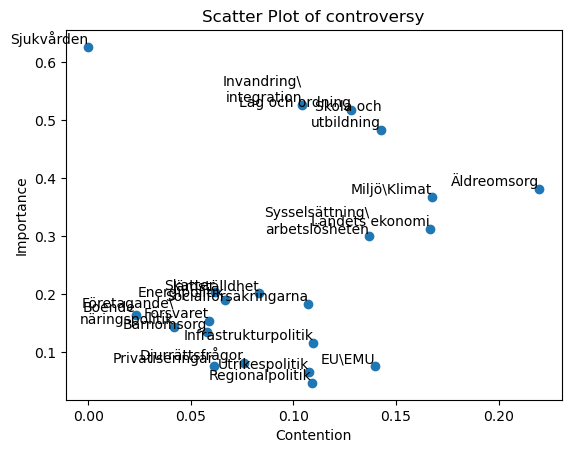

In [12]:
topics_diff_avg_list = list(topics_diff_avg.values())
topics_opinion_val_list = list(topics_opinion_val.values())
plt.scatter(topics_diff_avg_list, topics_opinion_val_list)
plt.xlabel('Contention')
plt.ylabel('Importance')
plt.title('Scatter Plot of controversy')
# plt.xlim(0, 1)
# plt.ylim(0, 1)
for i, label in enumerate(topics_opinion_val):
    plt.text(topics_diff_avg_list[i], topics_opinion_val_list[i], label, ha='right', va='bottom')

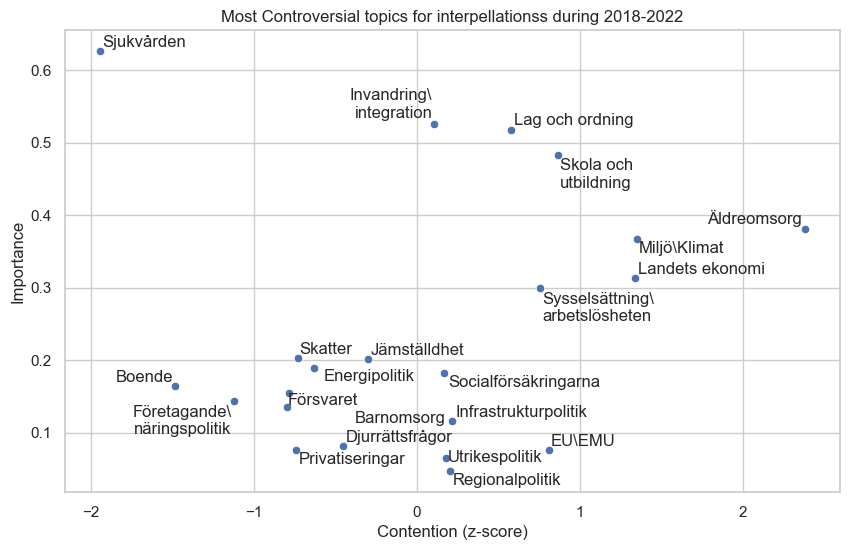

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from adjustText import adjust_text
# Calculate z-scores
topics_diff_avg_list_z_score = stats.zscore(topics_diff_avg_list)

# Create a DataFrame from your data
data = {'z_score': topics_diff_avg_list_z_score, 'opinion_val': topics_opinion_val_list}
df = pd.DataFrame(data)

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
scatter_plot = sns.scatterplot(x='z_score', y='opinion_val', data=df)

# Add labels and title
plt.xlabel('Contention (z-score)')
plt.ylabel('Importance')
plt.title('Most Controversial topics for interpellationss during 2018-2022')

# Add text annotations
# for i, label in enumerate(topics_opinion_val):
#     scatter_plot.text(df['z_score'][i], df['opinion_val'][i], label, ha='right', va='bottom')
texts = []
for i, label in enumerate(topics_opinion_val):
    texts.append(scatter_plot.text(df['z_score'][i], df['opinion_val'][i], label, ha='right', va='bottom'))
adjust_text(texts)
plt.savefig("controvery_interpellations_2018-2022.png",dpi=300)


plt.show()